In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib 
matplotlib.rcParams['axes.unicode_minus']=False # 作用：解决坐标轴为负时 负号显示为方框的问题
matplotlib.rcParams['font.family'] = 'SimHei' # 作用：解决图上汉字显示为方框的问题 在图上显示汉字

In [2]:
path_excel = "文件路径（脱敏处理）\\最终数据整理grb.xlsx"
time_excel = pd.read_excel(path_excel,sheet_name='测试数据汇总') 

In [3]:
time_excel

,算例名称,修改约束系数的倍数,迭代次数,总运行时间（秒）
0,IN_0904,factor = 1,2,617
1,IN_0904,factor = 10,3,905
2,IN_0904,factor = 100,2,829
3,IN_0904,factor = 1000,2,818
4,IN_0904,factor = 10000,3,1457
5,IN_0904,factor = 100000,3,2957
6,IN_0905,factor = 1,4,1805
7,IN_0905,factor = 10,2,1527
8,IN_0905,factor = 100,3,2006
9,IN_0905,factor = 1000,2,2090


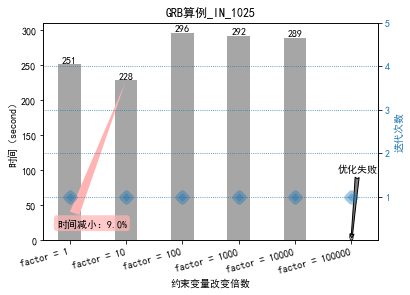

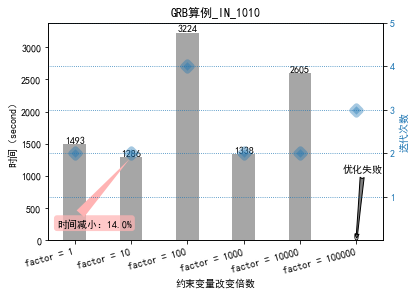

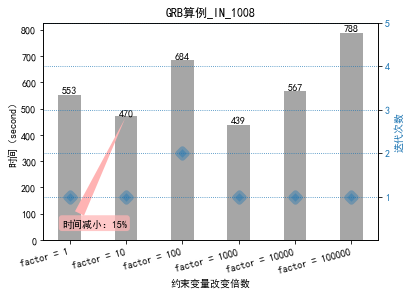

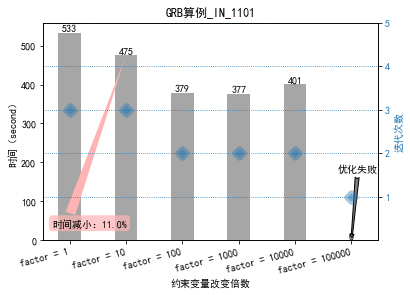

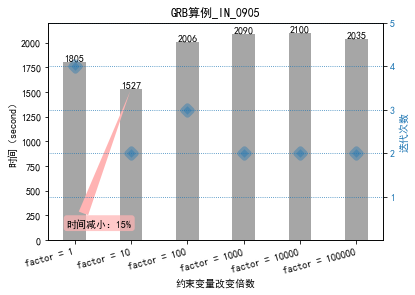

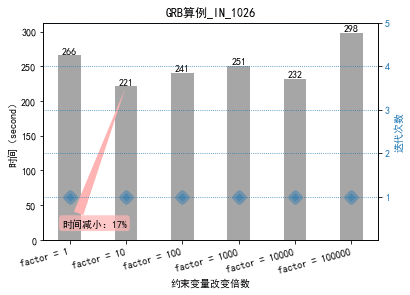

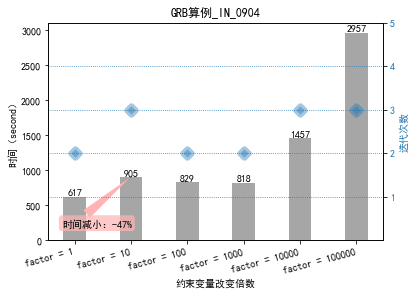

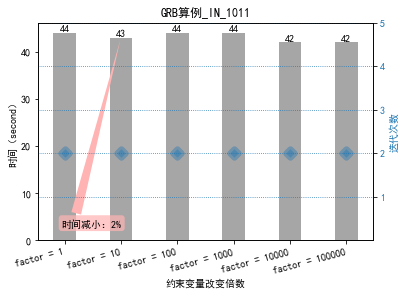

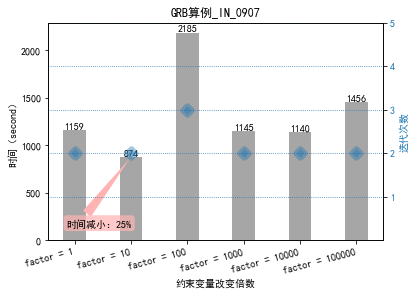

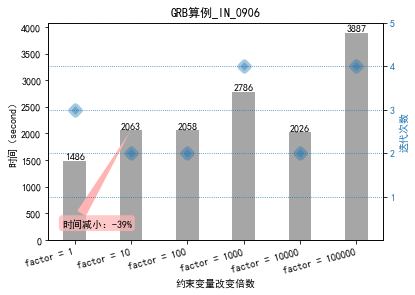

In [4]:
for m,n in zip(time_excel.iloc[:,0].value_counts().index,time_excel.iloc[:,0].value_counts()):
    
    fig,ax1 = plt.subplots(1,1) 
    name = m
    name_title = "GRB算例_"+name
    temp = time_excel.where(time_excel.iloc[:,0]==m).dropna() #截取需要处理的数据
    #把数据不为数字的部分置零，否则没法绘图
    for i in range(n):
        temp1 = temp.iloc[:,3].str.isdigit()
        if temp1.iloc[i]==False:
            temp.iloc[i,3] = 0
    #分开操作左右两个坐标轴，左边坐标轴
    color = 'tab:grey'    
    ax1.set_title(name_title)
    ax1.set_xlabel("约束变量改变倍数")
    ax1.set_ylabel("时间（second）")
    ax1.bar(temp.index,temp.iloc[:,3],color='grey',width=0.4,alpha=0.7)
    ax1.set_xticks(temp.index)
    ax1.set_xticklabels(temp.iloc[:,1])
    for j in range(n):
        ax1.text(temp.index[j],temp.iloc[j,3],'%d'%temp.iloc[j,3],ha='center',va='bottom')
        if temp.iloc[j,3]==0:
            ax1.annotate('优化失败',
            xy=(temp.index[j],temp.iloc[j,3]),xycoords='data',
            xytext=(1,0.35), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="fancy",facecolor=color),
            horizontalalignment='right', verticalalignment='top')
    plt.setp(ax1.get_xticklabels(), rotation=15, ha="right")
    ############################################
    #添加减小时间的说明
    #有些参数的意思还没有研究的很清楚（时间有限，以后再来看）
    ax1.annotate('时间减小：{}%'.format(round(100*(temp.iloc[0,3]-temp.iloc[1,3])/temp.iloc[0,3])),
            xy=(temp.index[1],temp.iloc[1,3]),xycoords='data',
            xytext=(0.25,0.1), textcoords='axes fraction',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none",alpha=0.7),
            arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                            fc=(1.0, 0.7, 0.7), ec="none",relpos=(0.2, 0.5)),
            horizontalalignment='right', verticalalignment='top')
    ############################################
    #分开操作左右两个坐标轴，右边坐标轴
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel('迭代次数', color=color)  # we already handled the x-label with ax1
    ax2.scatter(temp.index,temp.iloc[:,2], color=color,marker = 'D',linewidths = 6,alpha=0.4)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylim((0,4))
    ax2.set_yticks([1,2,3,4,5])
    ax2.grid(True, linestyle=':',color=color)
#     fig.set_size_inches((13, 13), forward=False) #设置图像大小
    fig.savefig("grb"+name,dpi = 300)